In [15]:
import numpy as np

In [16]:
x_train=np.loadtxt(r"C:\Users\Garv Khurana\OneDrive\Desktop\input.csv",delimiter=",")
y_train=np.loadtxt(r"C:\Users\Garv Khurana\OneDrive\Desktop\labels.csv",delimiter=",")
x_test=np.loadtxt(r"C:\Users\Garv Khurana\OneDrive\Desktop\input_test.csv",delimiter=",")
y_test=np.loadtxt(r"C:\Users\Garv Khurana\OneDrive\Desktop\labels_test.csv",delimiter=",")

In [17]:
print("the shape of x_train is:",x_train.shape)
print("the shape of y_train is:",y_train.shape)
print("the shape of x_test is:",x_test.shape)
print("the shape of y_test is:",y_test.shape)

the shape of x_train is: (2000, 30000)
the shape of y_train is: (2000,)
the shape of x_test is: (400, 30000)
the shape of y_test is: (400,)


here we have to reshape the x_train,y_train as these are the RGB files

In [18]:
x_train=x_train.reshape(len(x_train),100,100,3)
x_test=x_test.reshape(len(y_test),100,100,3)

In [19]:
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [20]:
print("the shape of x_train is:",x_train.shape)
print("the shape of y_train is:",y_train.shape)
print("the shape of x_test is:",x_test.shape)
print("the shape of y_test is:",y_test.shape)

the shape of x_train is: (2000, 100, 100, 3)
the shape of y_train is: (2000, 1)
the shape of x_test is: (400, 100, 100, 3)
the shape of y_test is: (400, 1)


In [21]:
x_train=x_train/255
x_test=x_test/255

In [22]:
x_train

array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

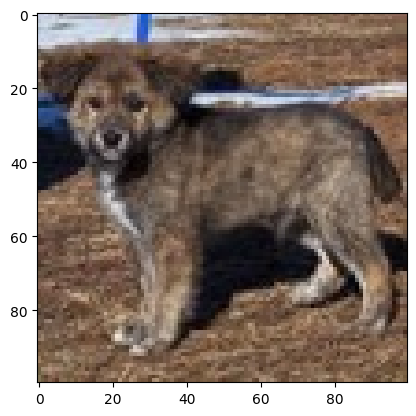

In [23]:
import random
import matplotlib.pyplot as plt
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])

In [24]:
from tensorflow.keras import Sequential
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Dropout,Conv2D
from tensorflow.keras.utils import image_dataset_from_directory

In [25]:

model=Sequential()
    
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100,3))),
model.add(MaxPooling2D((2,2))),


model.add(Conv2D(32, (3, 3), activation='relu')),
model.add(MaxPooling2D((2,2))),


model.add(Conv2D(32, (3, 3), activation='relu')),
model.add(MaxPooling2D((2,2))),


model.add(Flatten()),
model.add(Dense(units=2000,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1000,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=5000,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation="sigmoid"))
    

In [26]:
model.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(), optimizer="Adam", metrics=['accuracy'])

In [27]:
EarlyS=tensorflow.keras.callbacks.EarlyStopping( monitor='accuracy',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,)

In [33]:
model_hist=model.fit(x_train,y_train,batch_size=32,epochs=5,callbacks=EarlyS,verbose=1)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.9355 - loss: 0.1444
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9628 - loss: 0.1220
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.9464 - loss: 0.1432
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.9729 - loss: 0.0793
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.9811 - loss: 0.0525


In [36]:
from tensorflow.keras.models import save_model
save_model(model,"model.h5")